**Stock Market Prediction And Forcasting Using Stacked LSTM**

In this project we will be:


*   collect the stock data from apple (AAPL)
*   Preprocess the data - train and test
*   Create a Stacked LSTM model
*   Predict the test data and plot the output
*   Predict the future 30 days and plot the output




In [117]:
import pandas_datareader as pdr
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import numpy as np


Used Tiingo api

In [118]:
df = pdr.get_data_tiingo('AAPL', api_key="d9781ec95389d8096fe7072eeb2ba69737c9ee51")

<ipython-input-118-a5473252bfe3>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key="d9781ec95389d8096fe7072eeb2ba69737c9ee51")


In [119]:
df.to_csv('AAPL.csv')

In [120]:
df=pd.read_csv('AAPL.csv')

In [121]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-01-28 00:00:00+00:00,156.30,156.33,153.66,155.79,26192058,37.503432,37.510631,36.869977,37.381060,104768232,0.0,1.0
1,AAPL,2019-01-29 00:00:00+00:00,154.68,158.13,154.11,156.25,41587239,37.114721,37.942532,36.977952,37.491435,166348956,0.0,1.0
2,AAPL,2019-01-30 00:00:00+00:00,165.25,166.15,160.23,163.25,61109780,39.650942,39.866893,38.446417,39.171051,244439120,0.0,1.0
3,AAPL,2019-01-31 00:00:00+00:00,166.44,169.00,164.56,166.11,40739649,39.936477,40.550736,39.485380,39.857295,162958596,0.0,1.0
4,AAPL,2019-02-01 00:00:00+00:00,166.52,168.98,165.93,166.96,32668138,39.955672,40.545937,39.814105,40.061248,130672552,0.0,1.0


In [122]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2024-01-19 00:00:00+00:00,191.56,191.9500,188.8200,189.33,68902985,191.56,191.9500,188.8200,189.33,68902985,0.0,1.0
1254,AAPL,2024-01-22 00:00:00+00:00,193.89,195.3300,192.2600,192.30,60133852,193.89,195.3300,192.2600,192.30,60133852,0.0,1.0
1255,AAPL,2024-01-23 00:00:00+00:00,195.18,195.7500,193.8299,195.02,42355590,195.18,195.7500,193.8299,195.02,42355590,0.0,1.0
1256,AAPL,2024-01-24 00:00:00+00:00,194.50,196.3800,194.3400,195.42,53463269,194.50,196.3800,194.3400,195.42,53463269,0.0,1.0
1257,AAPL,2024-01-25 00:00:00+00:00,194.17,196.2675,193.1125,195.22,54822126,194.17,196.2675,193.1125,195.22,54822126,0.0,1.0


We will use the close column for the prediction

In [123]:
df1=df.reset_index()['close']

In [124]:
df1[1228:]

1228    194.71
1229    197.96
1230    198.11
1231    197.57
1232    195.89
1233    196.94
1234    194.83
1235    194.68
1236    193.60
1237    193.05
1238    193.15
1239    193.58
1240    192.53
1241    185.64
1242    184.25
1243    181.91
1244    181.18
1245    185.56
1246    185.14
1247    186.19
1248    185.59
1249    185.92
1250    183.63
1251    182.68
1252    188.63
1253    191.56
1254    193.89
1255    195.18
1256    194.50
1257    194.17
Name: close, dtype: float64

In [125]:
df1.shape

(1258,)

We will plot the Apple stock using matplotlib

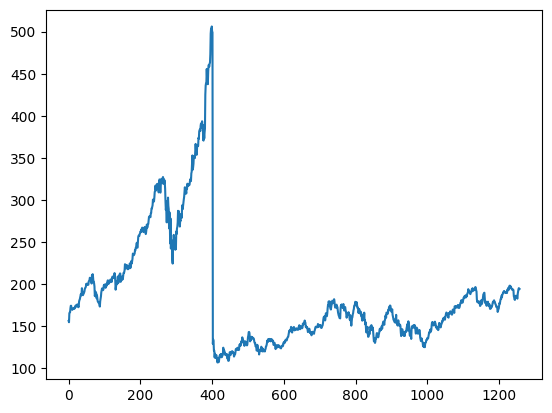

In [126]:
plt.plot(df1)

In [127]:
### LTSM are sensitive to the scale of the data, so we apply MinMax scaler

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [129]:
df1.shape
#shows values converted in an array from zero to one

(1258, 1)

In [130]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [131]:
training_size,test_size

(817, 441)

In [132]:
#Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-time_step -1):
    a = dataset[i:(i + time_step),0] ###i=0, 0,1,2,3------99 100 start at first elemt to last
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return numpy.array(dataX), numpy.array(dataY)

In [133]:
#reshape into X=t, T+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [134]:
print(X_train)

[[0.12388228 0.11982467 0.14629931 ... 0.21803381 0.22945523 0.2280025 ]
 [0.11982467 0.14629931 0.1492799  ... 0.22945523 0.2280025  0.23198497]
 [0.14629931 0.1492799  0.14948028 ... 0.2280025  0.23198497 0.23028178]
 ...
 [0.13668128 0.13800877 0.12515967 ... 0.1591985  0.1463995  0.14584847]
 [0.13800877 0.12515967 0.13375078 ... 0.1463995  0.14584847 0.15168441]
 [0.12515967 0.13375078 0.14642455 ... 0.14584847 0.15168441 0.15125861]]


In [135]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [136]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [137]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

**Create the stacked LSTM model**

In [138]:
### Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [139]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [140]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 349ms/step - loss: 0.0367 - val_loss: 6.9545e-04
Epoch 2/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0176 - val_loss: 0.0031
Epoch 3/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0108 - val_loss: 3.6089e-04
Epoch 4/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0096 - val_loss: 5.7785e-04
Epoch 5/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0083 - val_loss: 3.5822e-04
Epoch 6/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0077 - val_loss: 0.0019
Epoch 7/100
12/12 [==============================] - 3s 247ms/step - loss: 0.0069 - val_loss: 2.5432e-04
Epoch 8/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0072 - val_loss: 4.1916e-04
Epoch 9/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0057 - val_loss: 2.1829e-04
Epoch 10/100
12/12 [==============================] - 2s 174ms

In [142]:
import tensorflow as tf

In [143]:
tf.__version__

'2.15.0'

In [145]:
# Lets nowcreate the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 54ms/step


In [146]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [148]:
###Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
# train predict id output for trained data

218.52901792720672

In [149]:
### test Data RSME
math.sqrt(mean_squared_error(ytest,test_predict))

165.7128344758083

**Plotting the data**

Green = predicted output based on test data

Blue = Complete data set

orange = training data set

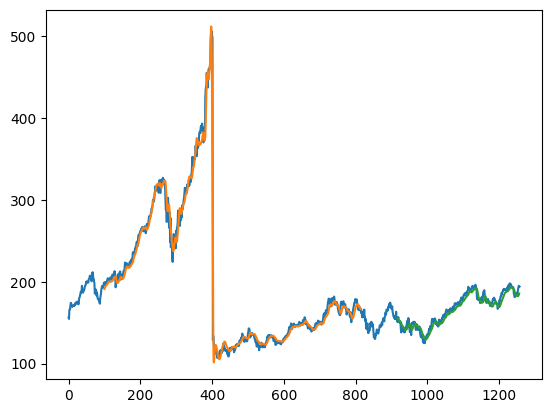

In [151]:
#shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [153]:
len(test_data)

441

In [154]:
#If I only want the data form the last 100 days than i will reshape the data
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [156]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [157]:
temp_input

[0.20693800876643703,
 0.20753913587977452,
 0.19053224796493418,
 0.1771321227301189,
 0.17868503443957418,
 0.18164057608015027,
 0.17397620538509706,
 0.16874139010644956,
 0.17257357545397617,
 0.17074514715090788,
 0.17815904821540385,
 0.18091421415153408,
 0.17194740137758296,
 0.16804007514088914,
 0.17019411396368184,
 0.173425172197871,
 0.16310582341891044,
 0.15927363807138384,
 0.15992485911083276,
 0.16122730118973072,
 0.16758922980588598,
 0.16420788979336254,
 0.1673638071383844,
 0.17049467752035058,
 0.17695679398872882,
 0.18071383844708827,
 0.17921102066374445,
 0.18274264245460237,
 0.1850219160926737,
 0.18036318096430803,
 0.18003757044458357,
 0.17610519724483403,
 0.17282404508453347,
 0.17187226048841575,
 0.1654101440200375,
 0.1657107075767063,
 0.1668127739511584,
 0.16095178459611764,
 0.15040701314965554,
 0.1537382592360676,
 0.15892298058860355,
 0.16012523481527863,
 0.16814026299311202,
 0.17715716969317463,
 0.17485284909204757,
 0.1813149655604257

In [171]:
#demostrate Prediction for the next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print('{}day input{}'.format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps,1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)



0day input[0.21139637 0.20686287 0.21685661 0.21410144 0.2189856  0.22259236
 0.21625548 0.22008766 0.22822793 0.22860363 0.2272511  0.22304321
 0.22567314 0.22038823 0.22001252 0.21730745 0.21592987 0.21618034
 0.21725736 0.21462743 0.19737007 0.19388854 0.18802755 0.18619912
 0.19716969 0.19611772 0.19874765 0.19724483 0.19807138 0.19233563
 0.18995617 0.20485911 0.21219787 0.21803381 0.22126487 0.21956168
 0.21873513 0.20444235 0.20532337 0.20458832 0.20302321 0.20120326
 0.19945563 0.19792891 0.19666274 0.19563536 0.19479181 0.19406061
 0.19336584 0.19263631 0.19181238 0.190851   0.18972753 0.18843628
 0.18698807 0.18540725 0.1837271  0.18198577 0.18022205 0.17847209
 0.17676632 0.17512804 0.17357245 0.17210649 0.17072961 0.16943479
 0.16821033 0.1670415  0.1659122  0.16480684 0.16371141 0.16261458
 0.16150811 0.16038738 0.15925084 0.15809974 0.15693755 0.15576933
 0.15460068 0.15343748 0.15228504 0.15114795 0.15002948 0.14893177
 0.14785567 0.14680091 0.14576636 0.14475025 0.14375

In [172]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [173]:
len(df1)

1258

In [174]:
df3=df1.tolist()
df3.extend(lst_output)

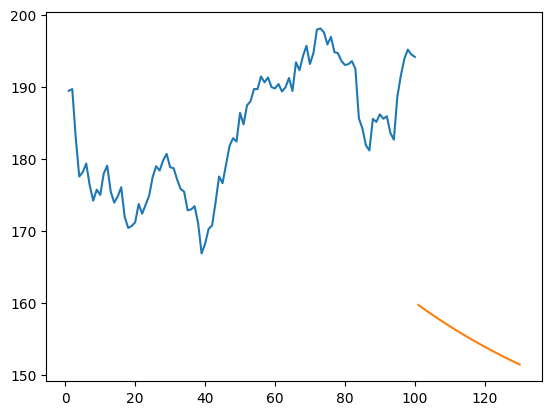

In [175]:
# we use 1158 becasue we are using the previous 100 data points from the 30 days
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

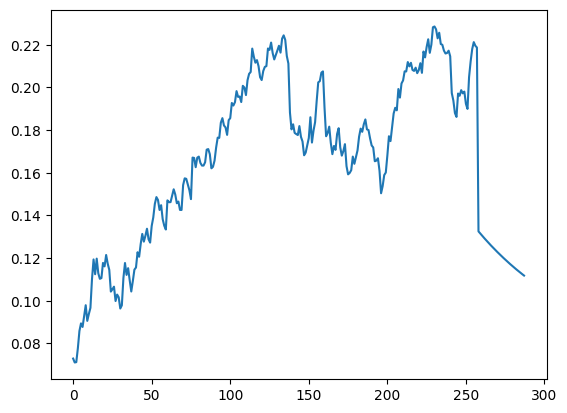

In [177]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])